   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900
5  1985        4  299900
6  1534        3  314900
7  1427        3  198999
8  1380        3  212000
9  1494        3  242500
              size    bedroom          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
   ones      size   bedroom     price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389
5     1 -0.019732  1.090417 -0.323998
6     1 -0.587240 -0.223675 -0.204036
7     1 -0.72188

Text(0.5, 1.0, 'error vs. training ')

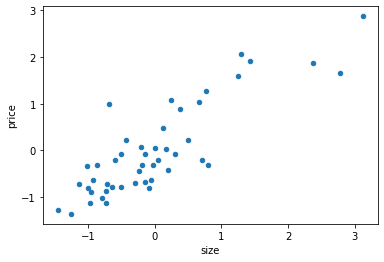

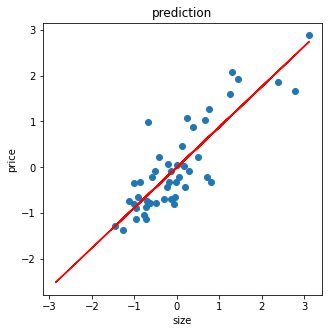

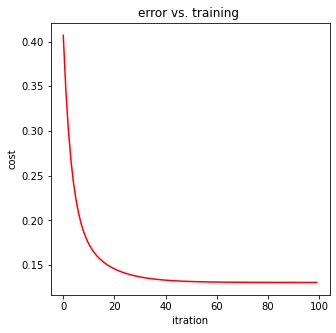

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
path='dataset.txt'
data=pd.read_csv(path,header=None,names =['size','bedroom','price'])
print(data.head(10))
print (data.describe())
data=(data-data.mean())/data.std()
data.plot(kind='scatter',x='size',y='price')
data.insert(0,'ones',1)
print (data.head(10))
col=data.shape[1]
print (col)

x=np.matrix(data.iloc[:,0:col-1])
y=np.matrix(data.iloc[:,col-1:col])
# print ('x :\n',x)
# print ('y :\n',y)
theta=np.matrix(np.array([0,0,0]))
print (theta)
def cost1 (x,y,theta):
    z=np.power(((x*theta.T)-y),2)
#     print('z: \n',z)
#     print ('m= ',len(x))
    return np.sum(z)/(2*len(x))
# print ('computerCost (x,y,theta):',cost (x,y,theta))
# print (theta.ravel().shape[1])
def gd (x,y,theta,alpha,itr):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost =np.zeros(itr)
    for i in range(itr):
        error=(x*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
        theta=temp
        cost[i]=cost1(x,y,theta)
    return theta, cost
alpha=.1
itr=100
s ,cost=gd(x,y,theta,alpha,itr)
print ('theta ',s)
print ('cost ',cost[0:50])

# x=np.linspace(data.size.min(),data.size.max(),100)
f=  s[0,0]+(s[0,1]*x)
fig,ax =plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='prediction')
ax.scatter(data['size'],data['price'],label='train the data')
ax.set_xlabel('size')
ax.set_ylabel('price')
ax.set_title('prediction')

fig,ax =plt.subplots(figsize=(5,5))
ax.plot(np.arange(itr),cost,'r')
ax.set_xlabel('itration')
ax.set_ylabel('cost')
ax.set_title('error vs. training ')
            
            
        
        
    
    

47
